# Dimensionality Reduction of Transit Data

There is a broad class of transit types observed by telescopes, unsupervised learning can aid in identifying different types of transit and also find new subdivisions within cluster, however the time series data relating to transits is extremely high dimensional, the following notebook applies dimensionality reduction to attempt to discern clusters within simulated transit data. 

In [25]:
#import modules 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
#TSVD for dimension > 50 
from sklearn.decomposition import TruncatedSVD as TSVD
# TSNE from 50 to 2D
from sklearn.manifold import TSNE

# Plotting function 

def plot_embedding(X, Title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(transit_target[i]),
                 color=plt.cm.Set1(transit_target[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]), plt.yticks([])
    if Title is not None:
        plt.title(Title)

        
#read transit data
transit_data = pd.read_csv('train.csv', header=0, index_col=0)

#drop target for unsupervised
transit_features = transit_data.drop(['target'], axis=1)

#retain targest for visualization 
transit_target = transit_data['target']

While TSNE has been applied standalone to the digit recognition dataset, many sources cite that reducing dimensionality down to 50 using Truncated Single Variable Decompoisiton(TSVD) followed by Total Stochastic Neighbor Embedding(TSNE) can yeild better results. 

As this is still the exploratory phase, the class labels have been kept where 1 signifies a planetary transit and 0 represents a non planetary transit event e.g. binary star system. 

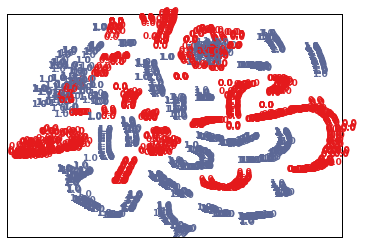

In [26]:
# for the first attemp we will use the default parameters, 
# a random state is specified for replicability accross the runs
svd = TSVD(n_components=50, random_state=0)
tsne = TSNE(n_components=2, random_state=0)

# transform the data
TSVD_reduction = svd.fit_transform(transit_features)
TSNE_reduction = tsne.fit_transform(TSVD_reduction)

# plot the reduction 
plot_embedding(TSNE_reduction)

plt.show()

As we can see, some streams of points are apparent, but there is a lot of mixing and slicing between the classes.

I did some research and found a highly cited paper released
by IBM that presents arguments for the downfalls of using 
Euclidean distance metrics (the default distance metric for TSNE) in higher dimensional space. Within the paper they claim and prove that the manhattan metric is better at overcoming the pitfalls in the curse of dimensionality.

In the conclusion they present an argument for fractional distance metrics as being best in higher dimensions which was interesting as well.

To reduce the the randomness of the results principal componenent analysis initialization was used; this is a fact stated in the TSNE documentation.  

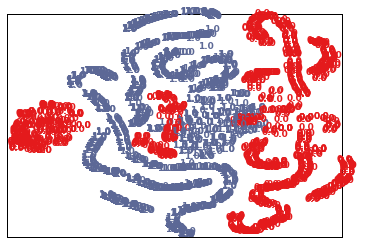

In [27]:
svd = TSVD(n_components=50, random_state=0)

tsne = TSNE(n_components=2, random_state=0, 
            init='pca', metric='manhattan')

TSVD_reduction = svd.fit_transform(transit_features)

TSNE_reduction = tsne.fit_transform(TSVD_reduction)

plot_embedding(TSNE_reduction)

plt.show()

This looks quite a bit better than the original plot, there is more defined separation between the classes and the streams are longer. 

The TSNE documentation lists 'Barnes-Hut' optimization of the gradient descent as an approximation so I set it ot use the the exact method out of curiousity and found that the end results of the above is a very distinct subdivision of the classes. 

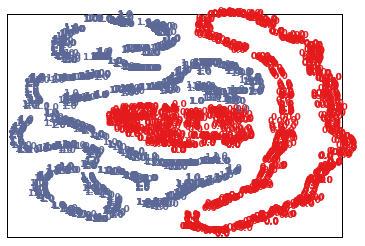

In [28]:
svd = TSVD(n_components=50, random_state=0)

tsne = TSNE(n_components=2, random_state=0, 
            init='pca', metric='manhattan', method='exact')

TSVD_reduction = svd.fit_transform(transit_features)

TSNE_reduction = tsne.fit_transform(TSVD_reduction)

plot_embedding(TSNE_reduction)

plt.show()

As we can see, the reductions with some tuning, are able to separate the data into discernable 
clusters which are appropriate based on the labels. It seems as if the data could be a candidate for unsupervised clustering. Dimensionality reduction can allow us to visualize these clusterings and mainting labels (much like which is done with supervised learning) can allow us to train unsupervised clustering algorithms before applying them to new data.  

### References: 

" On the Surprising Behavior of Distance Metrics 
in High Dimensional Space"

https://bib.dbvis.de/uploadedFiles/155.pdf"

Packages and plotting function used are from scikit-learn API:

Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

TSNE: 
https://lvdmaaten.github.io/tsne/